# Logistic Regression (Titanic - Dataset)

## 1. Loading Required Libraries

In [4]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

## 2. Loading and Checking Data

In [6]:
# Load Data

train_data = pd.read_csv("../Dataset/train.csv")
test_data = pd.read_csv("../Dataset/test.csv")

## 3. Exploratory Data Analysis (EDA)

In [7]:
# Checking for missing values

print(train_data.isnull().sum())

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


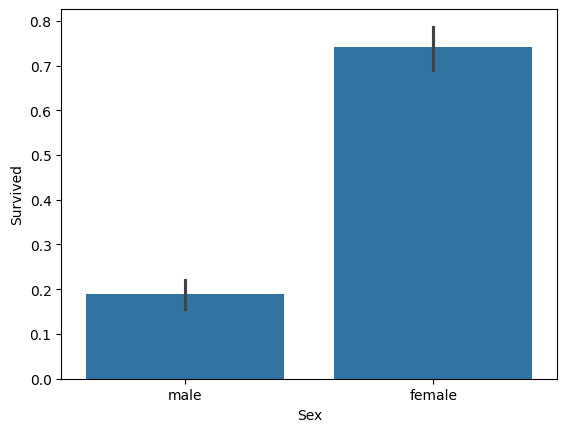

In [8]:
# Visualizing survival rate ny gender

sns.barplot(x='Sex', y='Survived', data=train_data)
plt.show()

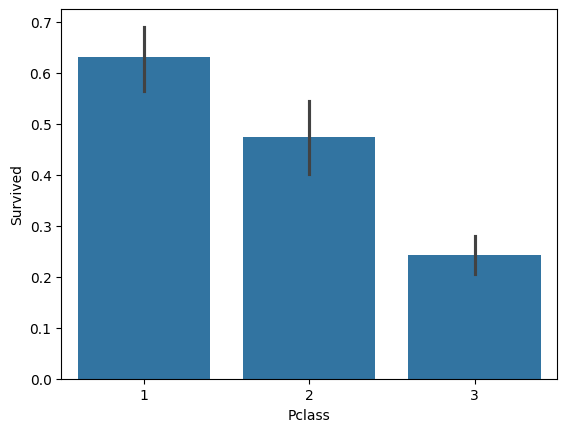

In [11]:
# Visualizing survival rate by passenger class

sns.barplot(x='Pclass', y='Survived', data=train_data)
plt.show()

## 4. Data Preprocessing

In [12]:
# Fill missing Age values with median age

train_data['Age'].fillna(train_data['Age'].median(), inplace=True)
test_data['Age'].fillna(test_data['Age'].median(), inplace=True)

C:\Users\ChaitanyaJindal\AppData\Local\Temp\ipykernel_26924\2754654596.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train_data['Age'].fillna(train_data['Age'].median(), inplace=True)
C:\Users\ChaitanyaJindal\AppData\Local\Temp\ipykernel_26924\2754654596.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting val

In [13]:
# Fill missing Embarked values with mode

train_data['Age'].fillna(train_data['Embarked'].mode()[0], inplace=True)

C:\Users\ChaitanyaJindal\AppData\Local\Temp\ipykernel_26924\2282054911.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train_data['Age'].fillna(train_data['Embarked'].mode()[0], inplace=True)


In [14]:
# Drop the 'Cabin' column (too many missing values)

train_data.drop(columns=['Cabin'], inplace=True)
test_data.drop(columns=['Cabin'], inplace=True)

In [15]:
# Fill missing Fare values in test data

test_data['Fare'].fillna(test_data['Fare'].median(), inplace=True)

C:\Users\ChaitanyaJindal\AppData\Local\Temp\ipykernel_26924\3439616388.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  test_data['Fare'].fillna(test_data['Fare'].median(), inplace=True)


In [16]:
# Convert categorical features to numerical (Sex, Embarked)

train_data['Sex'] = train_data['Sex'].map({'male': 0, 'female': 1})
test_data['Sex'] = test_data['Sex'].map({'male': 0, 'female': 1})

In [17]:
train_data['Embarked'] = train_data['Embarked'].map({'C': 0, 'Q': 1, 'S': 2})
test_data['Embarked'] = test_data['Embarked'].map({'C': 0, 'Q': 1, 'S': 2})

## 5. Feature Selection

In [18]:
features = ['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked']

X = train_data[features]
y = train_data['Survived']

## 6. Train-test split

In [19]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

## 7. Feature scaling

In [20]:
scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)

test_data_scaled = scaler.transform(test_data[features])